<a href="https://colab.research.google.com/github/sku1978/sk-share-repo/blob/main/ML/Natural%20Language%20Processing/spam-ham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk
import pandas as pd
import numpy as np
import urllib

In [2]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#!cat /root/nltk_data/corpora/stopwords/english

##Read File

In [5]:
messages=[line.decode("latin-1").rstrip(',\r\n') for line in urllib.request.urlopen('https://raw.githubusercontent.com/sku1978/sk-share-repo/main/ML/Natural%20Language%20Processing/spamham.csv')]

In [6]:
print(len(messages))
for mess_no, message in enumerate(messages[:15]):
  print(mess_no, message, '\n')

5573
0 v1,v2 

1 ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..." 

2 ham,Ok lar... Joking wif u oni... 

3 spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's 

4 ham,U dun say so early hor... U c already then say... 

5 ham,"Nah I don't think he goes to usf, he lives around here though" 

6 spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv" 

7 ham,Even my brother is not like to speak with me. They treat me like aids patent. 

8 ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune 

9 spam,WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 0

##Read File using Pandas

In [7]:
messages=pd.read_csv('https://raw.githubusercontent.com/sku1978/sk-share-repo/main/ML/Natural%20Language%20Processing/spamham.csv', sep=',', encoding='latin-1')
messages = messages.loc[:, ~messages.columns.str.contains('^Unnamed')]
messages.columns=['label', 'message']

##Process

In [8]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [9]:
messages['message_len']=messages['message'].apply(lambda x: len(x))

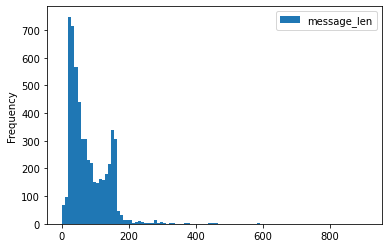

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
messages.plot.hist('message_len', bins=100)

In [11]:
messages.describe()

,message_len
count,5572.000000
mean,80.118808
std,59.690841
min,2.000000
25%,36.000000
50%,61.000000
75%,121.000000
max,910.000000


In [12]:
messages[messages['message_len']>700]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

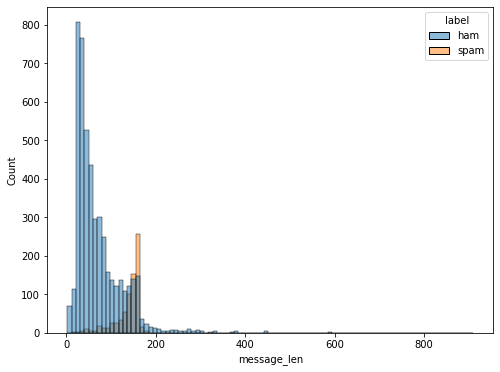

In [13]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(messages, x='message_len', hue='label', ax=ax )

#messages.hist(column='message_len', by='label', bins=100, figsize=(12,6))

##Preprocess Data

In [14]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
# from nltk.stem import PorterStemmer
# import spacy

#Tokenise, Remove stopwords and remove punctuations (isalnum)
def clean_string(x):
  stopwords_list=set(stopwords.words('english'))
  word_tokens=[w for w in word_tokenize(x) if w not in stopwords_list and w.isalnum()]
  return word_tokens


messages['message'].apply(clean_string)

0       [Go, jurong, point, Available, bugis, n, great...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, I, think, goes, usf, lives, around, though]
                              ...                        
5567    [This, 2nd, time, tried, 2, contact, U, Pound,...
5568                [Will, b, going, esplanade, fr, home]
5569                        [Pity, mood, So, suggestions]
5570    [The, guy, bitching, I, acted, like, intereste...
5571                              [Rofl, Its, true, name]
Name: message, Length: 5572, dtype: object

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

bow_transformer=CountVectorizer(analyzer=clean_string).fit(messages['message'])

In [16]:
bow_transformer.get_params()

{'analyzer': <function __main__.clean_string>,
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

###Test with a sample

In [17]:
mess4=messages['message'][3]
mess4

'U dun say so early hor... U c already then say...'

In [18]:
bow4=bow_transformer.transform([mess4])
print(bow4)

  (0, 3617)	2
  (0, 4134)	1
  (0, 4716)	1
  (0, 5532)	1
  (0, 5549)	1
  (0, 6406)	1
  (0, 8465)	2


In [20]:
print(bow_transformer.get_feature_names()[3617])
print(bow_transformer.get_feature_names()[4134])
print(bow_transformer.get_feature_names()[4716])
print(bow_transformer.get_feature_names()[5532])
print(bow_transformer.get_feature_names()[5549])
print(bow_transformer.get_feature_names()[6406])
print(bow_transformer.get_feature_names()[8465])

U
already
c
dun
early
hor
say


#Transform Data

In [23]:
messages_bow=bow_transformer.transform(messages['message'])
type(messages_bow)

scipy.sparse.csr.csr_matrix

In [ ]:
print(messages_bow.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print(messages_bow.shape)

(5572, 9990)


In [24]:
#Non Zero occurences
messages_bow.nnz

52896

In [ ]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.0950268286951704


In [25]:
#Term Frequency Inverse Document Frequency
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(messages_bow)

In [26]:
tfidf_transformer.get_params()

{'norm': 'l2', 'smooth_idf': True, 'sublinear_tf': False, 'use_idf': True}

In [29]:
tfidf4=tfidf_transformer.transform(bow4)

print(tfidf4)

  (0, 8465)	0.5391405744791059
  (0, 6406)	0.4383666212845426
  (0, 5549)	0.3217363624965853
  (0, 5532)	0.29914905743613074
  (0, 4716)	0.2947711981870732
  (0, 4134)	0.26585237007652435
  (0, 3617)	0.40815457711571285


In [30]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['mom']]

6.917638586467326

In [31]:
messages_tfidf=tfidf_transformer.transform(messages_bow)

#Train and Predict

In [32]:
from sklearn.naive_bayes import MultinomialNB

In [33]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [35]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [37]:
messages['label'][3]

'ham'

In [38]:
all_pred=spam_detect_model.predict(messages_tfidf)

In [40]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

#Build Pipeline with Train Test Split

In [43]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.3)

In [45]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
                     ('bow', CountVectorizer(analyzer=clean_string)),
                     ('tfidf', TfidfTransformer()),
                     ('classifier', MultinomialNB())
])

In [46]:
pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function clean_string at 0x7f80a2f525f0>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [47]:
predictions=pipeline.predict(msg_test)

In [49]:
from sklearn.metrics import classification_report

pd.DataFrame(classification_report(label_test, predictions, output_dict=True)).transpose()

,precision,recall,f1-score,support
ham,0.956291,1.000000,0.977657,1444.000000
spam,1.000000,0.710526,0.830769,228.000000
accuracy,0.960526,0.960526,0.960526,0.960526
macro avg,0.978146,0.855263,0.904213,1672.000000
weighted avg,0.962252,0.960526,0.957627,1672.000000


## Repeat with RandomForestClassifier

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
                     ('bow', CountVectorizer(analyzer=clean_string)),
                     ('tfidf', TfidfTransformer()),
                     ('classifier', RandomForestClassifier())
])

In [52]:
pipeline.fit(msg_train, label_train)
predictions=pipeline.predict(msg_test)
pd.DataFrame(classification_report(label_test, predictions, output_dict=True)).transpose()

,precision,recall,f1-score,support
ham,0.967180,1.000000,0.983316,1444.000000
spam,1.000000,0.785088,0.879607,228.000000
accuracy,0.970694,0.970694,0.970694,0.970694
macro avg,0.983590,0.892544,0.931462,1672.000000
weighted avg,0.971656,0.970694,0.969174,1672.000000
